# Baseline Modeling Exploration

### Exploring as Supervised Image Classification
- Sklearn for right now
  - SVM / Random Forest / KNN

In [1]:
import os

# data manipulation
import math
import pandas as pd
import numpy as np
from scipy import stats as stat

# image transformation
import skimage.transform as st


# model train/test/eval
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# modeling
from sklearn import svm # Supervised
from sklearn.ensemble import RandomForestClassifier # Supervised
from sklearn.neighbors import KNeighborsClassifier # Supervised
from sklearn.cluster import KMeans # Unsupervised

#data viz
from matplotlib import pyplot as plt
import seaborn as sea
import altair as alt
# Disabling a 5000 limit in Altair for max rows given data size
# alt.data_transformers.disable_max_rows()

# Data Munging - ETL
- Goes 16 Image processing
- Goes 17 Image processing
- Join to Bolide DF to get is_bolide
- Filter down to just is_bolide and the 200x200 image array

In [2]:
# GOES 16
goes_16_image_list = os.listdir('csm')
goes_16_image_ids = [int(goes_16_image_list[i][0:19]) for i in range(0, len(goes_16_image_list))]
goes_16_image_size = [int(goes_16_image_list[i][20]) for i in range(0, len(goes_16_image_list))]
goes_16_image_arrays = [np.load('csm/'+goes_16_image_list[i]) for i in range(0, len(goes_16_image_list))]
goes_16_image_array_shapes = [goes_16_image_arrays[i].shape for i in range(0,len(goes_16_image_arrays))]
goes_16_image_array_val_1 = [goes_16_image_array_shapes[i][0] for i in range(0,len(goes_16_image_array_shapes))]
goes_16_image_array_val_2 = [goes_16_image_array_shapes[i][1] for i in range(0,len(goes_16_image_array_shapes))]
goes_16_dict = {'potential_bolide_id': goes_16_image_ids, 'goes_16_image_name': goes_16_image_list, 'goes_16_image_size': goes_16_image_size, 'goes_16_image_array': goes_16_image_arrays, 'goes_16_image_array_shapes': goes_16_image_array_shapes, 'goes_16_image_array_val_1': goes_16_image_array_val_1, 'goes_16_image_array_val_2': goes_16_image_array_val_2}
goes_16_df = pd.DataFrame(goes_16_dict)
# Filtering for No 0's on H or W of the image
goes_16_df = goes_16_df[(goes_16_df['goes_16_image_array_val_1'] != 0) & (goes_16_df['goes_16_image_array_val_2'] != 0)]

In [3]:
# Resize images and add to dataframe
goes_16_df['goes_16_200_200_image_arrays'] = pd.Series([st.resize(goes_16_df['goes_16_image_array'][ind], (200,200)) for ind in goes_16_df.index])

In [4]:
# Select final columns needed
goes_16_df = goes_16_df[['potential_bolide_id', 'goes_16_image_name', 'goes_16_image_size', 'goes_16_200_200_image_arrays']]

In [5]:
# Add source as column
goes_16_df['satellite_source'] = 'goes_16'

In [6]:
# Rename columns to help with unioning
goes_16_df = goes_16_df.rename(columns={"goes_16_image_name": "image_name", "goes_16_image_size": "image_size", "goes_16_200_200_image_arrays": "200_200_image_arrays" })

In [7]:
# remove nulls
goes_16_df = goes_16_df.dropna()

In [8]:
goes_16_df.head()

,potential_bolide_id,image_name,image_size,200_200_image_arrays,satellite_source
0,1620211030216473001,1620211030216473001_1.npy,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",goes_16
1,1620211151332274001,1620211151332274001_2.npy,2,"[[0.0, 0.00020705882352939603, 0.0034509803921...",goes_16
2,1720220252254154001,1720220252254154001_1.npy,1,"[[0.003339607843137222, 0.0032737254901960416,...",goes_16
3,1620202711415229001,1620202711415229001_2.npy,2,"[[0.00392156862745098, 0.0039215686274509795, ...",goes_16
4,1720203351533097001,1720203351533097001_2.npy,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",goes_16


In [9]:
# GOES 17
goes_17_image_list = os.listdir('csm2')
goes_17_image_ids = [int(goes_17_image_list[i][0:19]) for i in range(0, len(goes_17_image_list))]
goes_17_image_size = [int(goes_17_image_list[i][20]) for i in range(0, len(goes_17_image_list))]
goes_17_image_arrays = [np.load('csm2/'+goes_17_image_list[i]) for i in range(0, len(goes_17_image_list))]
goes_17_image_array_shapes = [goes_17_image_arrays[i].shape for i in range(0,len(goes_17_image_arrays))]
goes_17_image_array_val_1 = [goes_17_image_array_shapes[i][0] for i in range(0,len(goes_17_image_array_shapes))]
goes_17_image_array_val_2 = [goes_17_image_array_shapes[i][1] for i in range(0,len(goes_17_image_array_shapes))]
goes_17_dict = {'potential_bolide_id': goes_17_image_ids, 'goes_17_image_name': goes_17_image_list, 'goes_17_image_size': goes_17_image_size, 'goes_17_image_array': goes_17_image_arrays, 'goes_17_image_array_shapes': goes_17_image_array_shapes, 'goes_17_image_array_val_1': goes_17_image_array_val_1, 'goes_17_image_array_val_2': goes_17_image_array_val_2}
goes_17_df = pd.DataFrame(goes_17_dict)
# Filtering for No 0's on H or W of the image
goes_17_df = goes_17_df[(goes_17_df['goes_17_image_array_val_1'] != 0) & (goes_17_df['goes_17_image_array_val_2'] != 0)]

In [10]:
# Resize images and add to dataframe
goes_17_df['goes_17_200_200_image_arrays'] = pd.Series([st.resize(goes_17_df['goes_17_image_array'][ind], (200,200)) for ind in goes_17_df.index])

In [11]:
# Select final columns needed
goes_17_df = goes_17_df[['potential_bolide_id', 'goes_17_image_name', 'goes_17_image_size', 'goes_17_200_200_image_arrays']]

In [12]:
# Add source as column
goes_17_df['satellite_source'] = 'goes_17'

In [13]:
# Rename columns to help with unioning
goes_17_df = goes_17_df.rename(columns={"goes_17_image_name": "image_name", "goes_17_image_size": "image_size", "goes_17_200_200_image_arrays": "200_200_image_arrays" })

In [14]:
# remove nulls
goes_17_df = goes_17_df.dropna()

In [15]:
goes_17_df.head()

,potential_bolide_id,image_name,image_size,200_200_image_arrays,satellite_source
1,1620211151332274001,1620211151332274001_2.npy,2,"[[0.00392156862745098, 0.00392156862745098, 0....",goes_17
2,1720220252254154001,1720220252254154001_1.npy,1,"[[0.00380862745098039, 0.00392156862745098, 0....",goes_17
4,1720203351533097001,1720203351533097001_2.npy,2,"[[0.00392156862745098, 0.00392156862745098, 0....",goes_17
5,1620212420149471001,1620212420149471001_1.npy,1,"[[0.00392156862745098, 0.00392156862745098, 0....",goes_17
6,1620203320828098001,1620203320828098001_2.npy,2,"[[0.002666666666666582, 0.002666666666666582, ...",goes_17


In [16]:
# Unioning the Goes 16 and 17 data together
unioned_df = pd.concat([goes_16_df, goes_17_df])

### Joining to the Potential Bolides file

In [17]:
# Potential Bolides + Vetted + Confidence Score
bolides_df = pd.read_csv('potential_with_vetted.csv')

In [18]:
# Left Joining the Images to the Potential Bolides dataset
bolides_etl = bolides_df.merge(unioned_df, on='potential_bolide_id', how='left')

# filtering down the data for where we have arrays and they are size 2
bolides_etl = bolides_etl[(bolides_etl['image_name'].notnull()) & (bolides_etl['image_size'] == 2.0)]
bolides_etl['is_bolide_num'] = np.where(bolides_etl['is_bolide'] == True, 1,
                                    0)
# finalizing dataframe for modeling
final_size2_df = bolides_etl[['is_bolide_num', '200_200_image_arrays']]
final_size2_df.head()

,is_bolide_num,200_200_image_arrays
10155,0,"[[0.00392156862745098, 0.00392156862745098, 0...."
10157,0,"[[0.00392156862745098, 0.00392156862745098, 0...."
10189,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10191,1,"[[0.00392156862745098, 0.00392156862745098, 0...."
10194,1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


In [19]:
final_size2_df.shape

(11908, 2)

In [54]:
final_size2_df['is_bolide_num'][10155]

0

In [55]:
final_size2_df['200_200_image_arrays']

10155     [[0.00392156862745098, 0.00392156862745098, 0....
10157     [[0.00392156862745098, 0.00392156862745098, 0....
10189     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
10191     [[0.00392156862745098, 0.00392156862745098, 0....
10194     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
                                ...                        
150987    [[5.490196078442564e-06, 2.2745098039259064e-0...
151055    [[0.00392156862745098, 0.00392156862745098, 0....
151066    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
151068    [[0.0037254901960782753, 0.0037254901960782753...
151078    [[0.00392156862745098, 0.00392156862745098, 0....
Name: 200_200_image_arrays, Length: 11908, dtype: object

(200, 200)


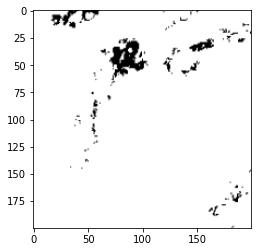

In [20]:
# Test an image to make sure it displays
print(final_size2_df['200_200_image_arrays'][10155].shape)
plt.imshow(final_size2_df['200_200_image_arrays'][10155], cmap='gray')
plt.show()

### Putting these back to Arrays for feeding into the SKLEARN models

In [21]:
# Make this back into an array of arrays for image processing/modeling
image_arrays = np.array([final_size2_df['200_200_image_arrays'][ind] for ind in final_size2_df.index])
image_arrays.shape

(11908, 200, 200)

In [22]:
# Making is_bolide an array again as well
is_bolide = np.array([final_size2_df['is_bolide_num'][ind] for ind in final_size2_df.index])
is_bolide.shape

(11908,)

# Modeling

### SKLEARN - IMAGE FLATTENING / TRAIN TEST SPLIT

In [23]:
# flatten the images
image_n_samples = len(image_arrays)
image_data = image_arrays.reshape((image_n_samples, -1))
image_data.shape

(11908, 40000)

In [24]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    image_data, is_bolide, test_size=0.5, shuffle=False
)

In [25]:
# Seeing what distribution of bolide/non-bolide looks like in Training
np.bincount(y_train)

array([3867, 2087])

In [26]:
# Seeing what distribution of bolide/non-bolide looks like in Testing
np.bincount(y_test)

array([3682, 2272])

### SKLEARN SVM - pretty slow....

In [27]:
# Create a classifier: a support vector classifier
clf = svm.SVC()
# Learn the digits on the train subset
clf.fit(X_train, y_train)

SVC()

In [28]:
# Predict the value of the digit on the test subset
clf_y_pred = clf.predict(X_test)

In [29]:
clf_accuracy = accuracy_score(y_test, clf_y_pred)

In [30]:
clf_accuracy

0.6184077930802822

In [31]:
classification_report(y_test, clf_y_pred, target_names=['no bolide', 'bolide'])

/Users/whifee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/whifee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/whifee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n   no bolide       0.62      1.00      0.76      3682\n      bolide       0.00      0.00      0.00      2272\n\n    accuracy                           0.62      5954\n   macro avg       0.31      0.50      0.38      5954\nweighted avg       0.38      0.62      0.47      5954\n'

[Text(0.5, 1.0, 'SVM Confusion Matrix')]

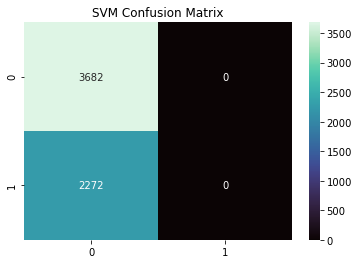

In [32]:
svm_conf_matrix = confusion_matrix(y_test, clf_y_pred)
svm_conf_heatmap = sea.heatmap(svm_conf_matrix, annot=True, cmap='mako', fmt='g').set(title='SVM Confusion Matrix')
svm_conf_heatmap

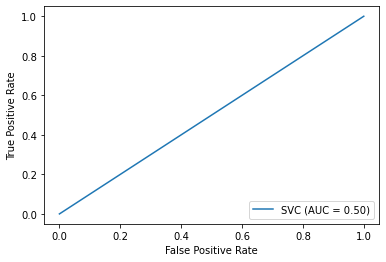

In [33]:
clf_fpr, clf_tpr, clf_thresholds = metrics.roc_curve(y_test, clf_y_pred)
clf_roc_auc = metrics.auc(clf_fpr, clf_tpr)
clf_display = metrics.RocCurveDisplay(fpr=clf_fpr, tpr=clf_tpr, roc_auc=clf_roc_auc, 
                                  estimator_name='SVC')
clf_display.plot()
plt.show()

### SKLEARN RANDOM FOREST

In [34]:
rf_model= RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rf_y_pred= rf_model.predict(X_test)
rf_y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [36]:
accuracy_score(y_test, rf_y_pred)

0.6002687269062815

In [56]:
classification_report(y_test, rf_y_pred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.93      0.74      3682\n           1       0.38      0.07      0.12      2272\n\n    accuracy                           0.60      5954\n   macro avg       0.50      0.50      0.43      5954\nweighted avg       0.53      0.60      0.51      5954\n'

[Text(0.5, 1.0, 'Random Forest Confusion Matrix')]

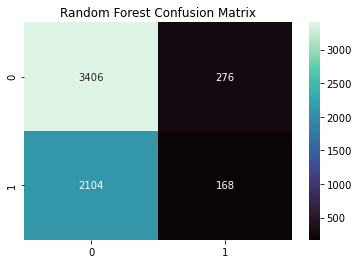

In [38]:
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_conf_heatmap = sea.heatmap(rf_conf_matrix, annot=True, cmap='mako', fmt='g').set(title='Random Forest Confusion Matrix')
rf_conf_heatmap

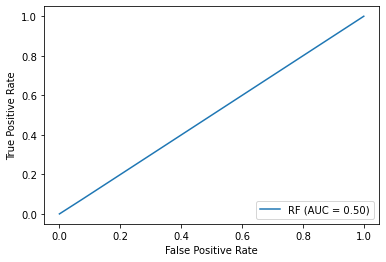

In [39]:
rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test, rf_y_pred)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)
rf_display = metrics.RocCurveDisplay(fpr=rf_fpr, tpr=rf_tpr, roc_auc=rf_roc_auc, 
                                  estimator_name='RF')
rf_display.plot()
plt.show()

### SKLEARN K NEAREST NEIGHBORS

In [40]:
knn=KNeighborsClassifier(n_neighbors=7)

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [42]:
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([1, 0, 0, ..., 0, 0, 0])

In [43]:
accuracy_score(y_test, y_pred_knn)

0.5811219348337252

In [44]:
classification_report(y_test, y_pred_knn, target_names=['no bolide', 'bolide'])

'              precision    recall  f1-score   support\n\n   no bolide       0.62      0.85      0.71      3682\n      bolide       0.38      0.15      0.22      2272\n\n    accuracy                           0.58      5954\n   macro avg       0.50      0.50      0.47      5954\nweighted avg       0.53      0.58      0.52      5954\n'

[Text(0.5, 1.0, 'KNN Confusion Matrix')]

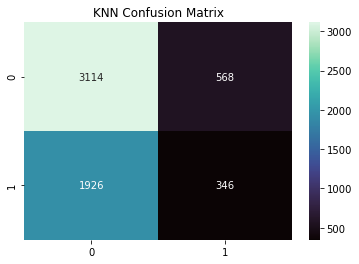

In [45]:
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
knn_conf_heatmap = sea.heatmap(knn_conf_matrix, annot=True, cmap='mako', fmt='g').set(title='KNN Confusion Matrix')
knn_conf_heatmap

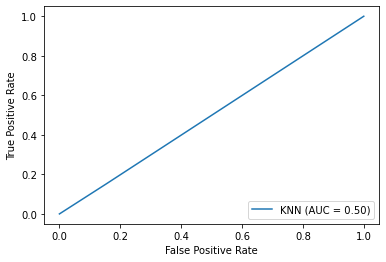

In [46]:
knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
knn_roc_auc = metrics.auc(knn_fpr, knn_tpr)
knn_display = metrics.RocCurveDisplay(fpr=knn_fpr, tpr=knn_tpr, roc_auc=knn_roc_auc, 
                                  estimator_name='KNN')
knn_display.plot()
plt.show()

# START OF EXPLORING UNSUPERVISED K-MEANS

### Thought: If we do Unsupervised Clustering - Can we get Cloudy/Not Cloudy (2 Clusters)
- This could then be a feature with other features and is more data scienc-y than an average of image pixels

In [47]:
k_means = KMeans(n_clusters=2) 

k_means.fit(X_train)

KMeans(n_clusters=2)

In [48]:
cluster_assignments = k_means.predict(X_test)

In [49]:
print(cluster_assignments.shape)

(5954,)


In [50]:
print('Category 1', (cluster_assignments == 0).sum())
print('Category 2', (cluster_assignments == 1).sum())

Category 1 5268
Category 2 686


In [51]:
k_means.cluster_centers_[:, 0]

array([0.0187196 , 0.71878784])

In [52]:
k_means.cluster_centers_[:, 1]

array([0.01858236, 0.71764734])

In [53]:
# Make a dataframe of the clusters

k_means_df = final_size2_df.reset_index()
k_means_df['clusters'] = pd.Series(cluster_assignments)
k_means_df.head()

,index,is_bolide_num,200_200_image_arrays,clusters
0,10155,0,"[[0.00392156862745098, 0.00392156862745098, 0....",0.0
1,10157,0,"[[0.00392156862745098, 0.00392156862745098, 0....",0.0
2,10189,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
3,10191,1,"[[0.00392156862745098, 0.00392156862745098, 0....",0.0
4,10194,1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0.0
